# Web Scraping NBA Standings Table

- Goal: Extract NBA Standings and put into a table

In [2]:
# Download all necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [3]:
# Get the web page
page = requests.get("http://www.espn.com/nba/standings/_/group/league")
soup = BeautifulSoup(page.content, 'html.parser')


- Notes:
    1. It looks like the data is split into two (i.e. Eastern vs. Western Conference). So we need to deal with each one separately.
    2. Within each div class for easter and western conference, there is a table tag called id = standings-table-east and id = standings-table-west
    3. let's try to get down to this...

In [4]:
# 0 = league names, 1 = league data
nbaTables = soup.find_all(class_= "Table2__tbody")

In [5]:
# get list of all team names (in current order)
teams = nbaTables[0].find_all(class_="hide-mobile")
teams = [t.get_text() for t in teams]

print(teams)

['Houston Rockets', 'Golden State Warriors', 'Toronto Raptors', 'Boston Celtics', 'Cleveland Cavaliers', 'Minnesota Timberwolves', 'Portland Trail Blazers', 'Washington Wizards', 'San Antonio Spurs', 'New Orleans Pelicans', 'Oklahoma City Thunder', 'Indiana Pacers', 'Philadelphia 76ers', 'Milwaukee Bucks', 'Denver Nuggets', 'LA Clippers', 'Miami Heat', 'Utah Jazz', 'Detroit Pistons', 'Charlotte Hornets', 'Los Angeles Lakers', 'New York Knicks', 'Chicago Bulls', 'Brooklyn Nets', 'Sacramento Kings', 'Dallas Mavericks', 'Atlanta Hawks', 'Phoenix Suns', 'Memphis Grizzlies', 'Orlando Magic']


In [6]:
# create an empty dataframe to return
df = pd.DataFrame(index = teams, columns = ['W', 'L', 'PCT', 'GB', 
                                            'HOME','AWAY','DIV',
                                           'CONF','PPG', 'OPP PPG',
                                           'DIFF','STRK','L10'])
df = df.fillna(0)
df.columns[1]

'L'

In [7]:
# get stats per team
statsPerTeam = nbaTables[1].select(".Table2__tr")

# extract data from each column for each team
# notice that each team has its own idx (data-idx = "")
idx = np.arange(0,len(statsPerTeam))

# for each team
for teamIdx in idx:
    currTeam = statsPerTeam[teamIdx].select(".stat-cell")
    
    # get their stats
    stats = [s.get_text() for s in currTeam]
    statColIdx = np.arange(0,len(stats))
    
    # for each stat
    for i in statColIdx:
        # add to df
        #df.ix[teamIdx, df.columns[i]] = stats[i]
        df.iloc[teamIdx, df.columns.get_loc(df.columns[i])] = stats[i]
        
df

,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10
Houston Rockets,48,13,.787,-,24-6,24-7,8-3,30-8,113.8,104.9,+8.9,W14,10-0
Golden State Warriors,48,14,.774,0.5,24-7,24-7,8-2,27-11,116.1,107.5,+8.6,W4,7-3
Toronto Raptors,43,17,.717,4.5,25-5,18-12,8-3,27-8,112.3,103.5,+8.7,W2,9-1
Boston Celtics,44,19,.698,5,23-11,21-8,10-3,28-13,104.1,99.9,+4.2,W4,6-4
Cleveland Cavaliers,36,25,.590,12,21-10,15-15,8-5,26-14,109.9,109.8,+0.1,L1,6-4
Minnesota Timberwolves,38,27,.585,12,25-7,13-20,9-3,28-12,109.8,106.9,+2.9,L1,5-5
Portland Trail Blazers,36,26,.581,12.5,19-11,17-15,6-6,22-15,105.2,103.4,+1.7,W5,7-3
Washington Wizards,36,26,.581,12.5,18-12,18-14,6-5,23-15,107.3,105.6,+1.7,L1,6-4
San Antonio Spurs,36,26,.581,12.5,22-7,14-19,6-5,20-16,102.2,99.2,+3.1,L1,3-7
New Orleans Pelicans,35,26,.574,13,17-12,18-14,5-4,17-19,112.1,111.7,+0.4,W7,7-3


# Visualization

- let's visualize some of these results

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

In [33]:
# change columns W and L as float
df[['W','L','PCT']] = df[['W','L','PCT']].astype(float)

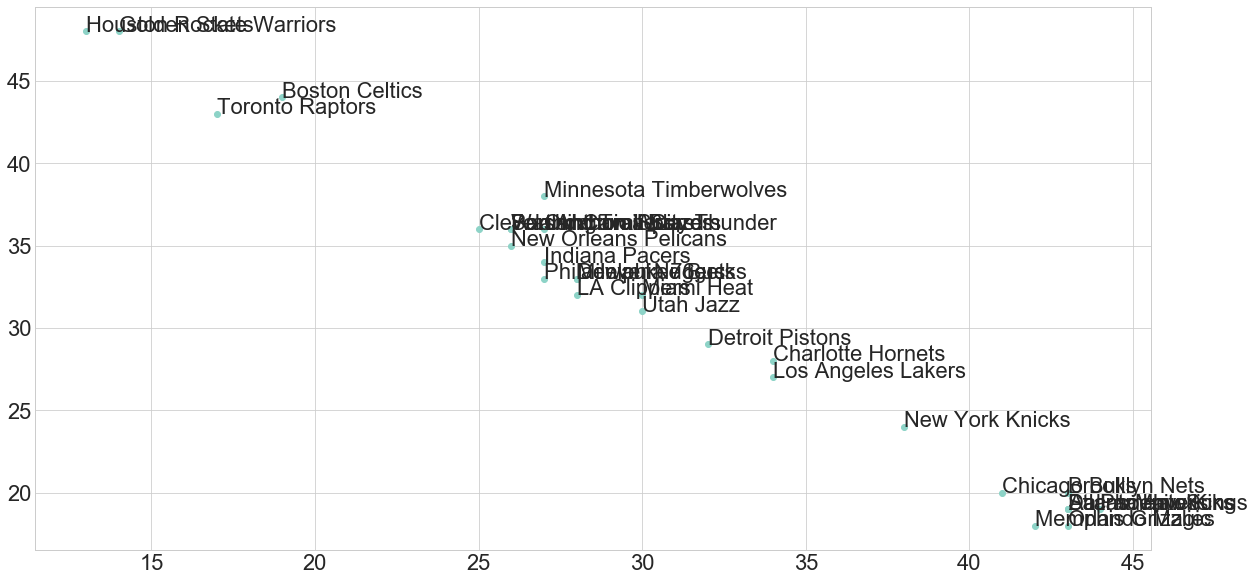

In [34]:
tempDf = df.as_matrix(columns = df.columns[0:])
W = tempDf[0:len(tempDf),0]
L = tempDf[0:len(tempDf),1]
teamNames = df.index

fig, ax = plt.subplots()
ax.scatter(L,W)

for i, txt in enumerate(teamNames):
    ax.annotate(txt, (L[i], W[i]))

plt.show()


In [29]:
# highlight max numbers in each columns
#df.style.background_gradient()

ModuleNotFoundError: No module named 'qgrid'